kaggle ~ https://www.kaggle.com/datasets/joebeachcapital/nintendo-games

In [20]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# Load dataset
Games = pd.read_csv('NintendoGames.csv')
Games

,meta_score,title,platform,date,user_score,link,esrb_rating,developers,genres
0,NaN,Super Mario RPG,Switch,"Nov 17, 2023",NaN,/game/switch/super-mario-rpg,E,['Nintendo'],"['Role-Playing', 'Japanese-Style']"
1,NaN,WarioWare: Move It!,Switch,"Nov 3, 2023",NaN,/game/switch/warioware-move-it!,RP,['Intelligent Systems'],"['Miscellaneous', 'Party / Minigame']"
2,NaN,Super Mario Bros. Wonder,Switch,"Oct 20, 2023",NaN,/game/switch/super-mario-bros-wonder,E,['Nintendo'],"['Action', 'Platformer', '2D']"
3,NaN,Detective Pikachu Returns,Switch,"Oct 6, 2023",NaN,/game/switch/detective-pikachu-returns,NaN,['Creatures Inc.'],"['Adventure', '3D', 'Third-Person']"
4,NaN,Fae Farm,Switch,"Sep 8, 2023",NaN,/game/switch/fae-farm,E10+,['Phoenix Labs'],"['Simulation', 'Virtual', 'Virtual Life']"
...,...,...,...,...,...,...,...,...,...
1089,NaN,Yo-kai Watch 4,Switch,TBA,NaN,/game/switch/yo-kai-watch-4,E10+,['Level 5'],"['Role-Playing', 'Trainer']"
1090,NaN,Splatoon 3: Expansion Pass Wave 2 - Side Order,Switch,TBA,NaN,/game/switch/splatoon-3-expansion-pass-wave-2-...,NaN,['Nintendo'],"['Action', 'Shooter', 'Third-Person', 'Arcade']"
1091,NaN,Mario Kart 8 Deluxe: Booster Course Pass - Wave 6,Switch,TBA,NaN,/game/switch/mario-kart-8-deluxe-booster-cours...,NaN,['Nintendo'],"['Racing', 'Arcade', 'Automobile']"
1092,NaN,Princess Peach for Nintendo Switch,Switch,TBA 2024,NaN,/game/switch/princess-peach-for-nintendo-switch,NaN,['Nintendo'],"['Adventure', 'General']"


In [22]:
Games.isnull().sum()

meta_score     385
title            0
platform         0
date             0
user_score     238
link             0
esrb_rating    122
developers       3
genres           0
dtype: int64

We can use the games which don't have meta scores as a holdout set and train and test with the remaining games

In [23]:
HoldoutData = Games[Games['meta_score'].isnull() == True]
HoldoutData

,meta_score,title,platform,date,user_score,link,esrb_rating,developers,genres
0,NaN,Super Mario RPG,Switch,"Nov 17, 2023",NaN,/game/switch/super-mario-rpg,E,['Nintendo'],"['Role-Playing', 'Japanese-Style']"
1,NaN,WarioWare: Move It!,Switch,"Nov 3, 2023",NaN,/game/switch/warioware-move-it!,RP,['Intelligent Systems'],"['Miscellaneous', 'Party / Minigame']"
2,NaN,Super Mario Bros. Wonder,Switch,"Oct 20, 2023",NaN,/game/switch/super-mario-bros-wonder,E,['Nintendo'],"['Action', 'Platformer', '2D']"
3,NaN,Detective Pikachu Returns,Switch,"Oct 6, 2023",NaN,/game/switch/detective-pikachu-returns,NaN,['Creatures Inc.'],"['Adventure', '3D', 'Third-Person']"
4,NaN,Fae Farm,Switch,"Sep 8, 2023",NaN,/game/switch/fae-farm,E10+,['Phoenix Labs'],"['Simulation', 'Virtual', 'Virtual Life']"
...,...,...,...,...,...,...,...,...,...
1089,NaN,Yo-kai Watch 4,Switch,TBA,NaN,/game/switch/yo-kai-watch-4,E10+,['Level 5'],"['Role-Playing', 'Trainer']"
1090,NaN,Splatoon 3: Expansion Pass Wave 2 - Side Order,Switch,TBA,NaN,/game/switch/splatoon-3-expansion-pass-wave-2-...,NaN,['Nintendo'],"['Action', 'Shooter', 'Third-Person', 'Arcade']"
1091,NaN,Mario Kart 8 Deluxe: Booster Course Pass - Wave 6,Switch,TBA,NaN,/game/switch/mario-kart-8-deluxe-booster-cours...,NaN,['Nintendo'],"['Racing', 'Arcade', 'Automobile']"
1092,NaN,Princess Peach for Nintendo Switch,Switch,TBA 2024,NaN,/game/switch/princess-peach-for-nintendo-switch,NaN,['Nintendo'],"['Adventure', 'General']"


In [24]:
Games = Games[~Games['title'].isin(HoldoutData['title'])]
Games

,meta_score,title,platform,date,user_score,link,esrb_rating,developers,genres
5,87.0,Pikmin 4,Switch,"Jul 21, 2023",9.0,/game/switch/pikmin-4,E10+,['Nintendo'],"['Strategy', 'Real-Time', 'General']"
7,74.0,Mario Kart 8 Deluxe: Booster Course Pass - Wave 5,Switch,"Jul 12, 2023",7.6,/game/switch/mario-kart-8-deluxe-booster-cours...,NaN,['Nintendo'],"['Racing', 'Arcade', 'Automobile']"
8,56.0,Everybody 1-2-Switch!,Switch,"Jun 30, 2023",5.4,/game/switch/everybody-1-2-switch!,E,['Nintendo'],"['Miscellaneous', 'Party / Minigame']"
9,82.0,Pikmin 1,Switch,"Jun 21, 2023",8.4,/game/switch/pikmin-1,E10+,['Nintendo'],"['Strategy', 'Real-Time', 'General']"
10,65.0,Pikmin 2,Switch,"Jun 21, 2023",8.6,/game/switch/pikmin-2,E10+,['Nintendo'],"['Strategy', 'Real-Time', 'General']"
...,...,...,...,...,...,...,...,...,...
1064,88.0,Diddy Kong Racing,N64,"Nov 24, 1997",8.4,/game/nintendo-64/diddy-kong-racing,E,['Rare Ltd.'],"['Driving', 'Racing', 'Kart']"
1065,96.0,GoldenEye 007,N64,"Aug 25, 1997",8.9,/game/nintendo-64/goldeneye-007,T,['Rare Ltd.'],"['Action', 'Shooter', 'First-Person', 'Modern']"
1067,90.0,Blast Corps,N64,"Feb 28, 1997",8.4,/game/nintendo-64/blast-corps,E,['Rare Ltd.'],"['Action', 'General']"
1070,80.0,Pilotwings 64,N64,"Sep 29, 1996",7.9,/game/nintendo-64/pilotwings-64,E,['Paradigm Entertainment'],"['Simulation', 'General']"


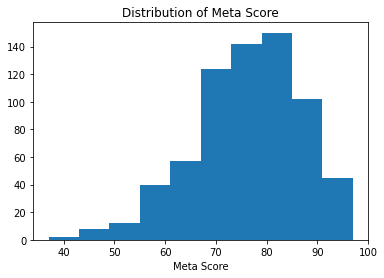

In [25]:
plt.hist(Games.meta_score)
plt.xlabel('Meta Score')
plt.title('Distribution of Meta Score')
plt.show()

## Data Cleaning

In [26]:
Games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682 entries, 5 to 1081
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   meta_score   682 non-null    float64
 1   title        682 non-null    object 
 2   platform     682 non-null    object 
 3   date         682 non-null    object 
 4   user_score   663 non-null    float64
 5   link         682 non-null    object 
 6   esrb_rating  647 non-null    object 
 7   developers   682 non-null    object 
 8   genres       682 non-null    object 
dtypes: float64(2), object(7)
memory usage: 53.3+ KB


In [27]:
# Don't need title or link
Games.drop(columns=['title', 'link'], inplace=True)
Games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682 entries, 5 to 1081
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   meta_score   682 non-null    float64
 1   platform     682 non-null    object 
 2   date         682 non-null    object 
 3   user_score   663 non-null    float64
 4   esrb_rating  647 non-null    object 
 5   developers   682 non-null    object 
 6   genres       682 non-null    object 
dtypes: float64(2), object(5)
memory usage: 42.6+ KB


/Users/bdogellis/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [28]:
Games

,meta_score,platform,date,user_score,esrb_rating,developers,genres
5,87.0,Switch,"Jul 21, 2023",9.0,E10+,['Nintendo'],"['Strategy', 'Real-Time', 'General']"
7,74.0,Switch,"Jul 12, 2023",7.6,NaN,['Nintendo'],"['Racing', 'Arcade', 'Automobile']"
8,56.0,Switch,"Jun 30, 2023",5.4,E,['Nintendo'],"['Miscellaneous', 'Party / Minigame']"
9,82.0,Switch,"Jun 21, 2023",8.4,E10+,['Nintendo'],"['Strategy', 'Real-Time', 'General']"
10,65.0,Switch,"Jun 21, 2023",8.6,E10+,['Nintendo'],"['Strategy', 'Real-Time', 'General']"
...,...,...,...,...,...,...,...
1064,88.0,N64,"Nov 24, 1997",8.4,E,['Rare Ltd.'],"['Driving', 'Racing', 'Kart']"
1065,96.0,N64,"Aug 25, 1997",8.9,T,['Rare Ltd.'],"['Action', 'Shooter', 'First-Person', 'Modern']"
1067,90.0,N64,"Feb 28, 1997",8.4,E,['Rare Ltd.'],"['Action', 'General']"
1070,80.0,N64,"Sep 29, 1996",7.9,E,['Paradigm Entertainment'],"['Simulation', 'General']"


In [32]:
# Need to change date to datetime
Games[Games['date'] == 'TBA']


,meta_score,platform,date,user_score,esrb_rating,developers,genres
577,69.0,WII,TBA,8.8,NaN,['Monolith Soft'],"['Action', 'General']"
578,66.0,WII,TBA,7.8,NaN,['Cing'],"['Adventure', 'General']"


In [34]:
Games = Games[Games['date'] != 'TBA']
Games

,meta_score,platform,date,user_score,esrb_rating,developers,genres
5,87.0,Switch,"Jul 21, 2023",9.0,E10+,['Nintendo'],"['Strategy', 'Real-Time', 'General']"
7,74.0,Switch,"Jul 12, 2023",7.6,NaN,['Nintendo'],"['Racing', 'Arcade', 'Automobile']"
8,56.0,Switch,"Jun 30, 2023",5.4,E,['Nintendo'],"['Miscellaneous', 'Party / Minigame']"
9,82.0,Switch,"Jun 21, 2023",8.4,E10+,['Nintendo'],"['Strategy', 'Real-Time', 'General']"
10,65.0,Switch,"Jun 21, 2023",8.6,E10+,['Nintendo'],"['Strategy', 'Real-Time', 'General']"
...,...,...,...,...,...,...,...
1064,88.0,N64,"Nov 24, 1997",8.4,E,['Rare Ltd.'],"['Driving', 'Racing', 'Kart']"
1065,96.0,N64,"Aug 25, 1997",8.9,T,['Rare Ltd.'],"['Action', 'Shooter', 'First-Person', 'Modern']"
1067,90.0,N64,"Feb 28, 1997",8.4,E,['Rare Ltd.'],"['Action', 'General']"
1070,80.0,N64,"Sep 29, 1996",7.9,E,['Paradigm Entertainment'],"['Simulation', 'General']"


In [36]:
Games[Games['date'] == 'Canceled']

,meta_score,platform,date,user_score,esrb_rating,developers,genres
1081,68.0,WIIU,Canceled,7.8,NaN,['TOSE'],"['Action', 'Miscellaneous', 'Rhythm', 'Music',..."


In [37]:
Games = Games[Games['date'] != 'Canceled']
Games

,meta_score,platform,date,user_score,esrb_rating,developers,genres
5,87.0,Switch,"Jul 21, 2023",9.0,E10+,['Nintendo'],"['Strategy', 'Real-Time', 'General']"
7,74.0,Switch,"Jul 12, 2023",7.6,NaN,['Nintendo'],"['Racing', 'Arcade', 'Automobile']"
8,56.0,Switch,"Jun 30, 2023",5.4,E,['Nintendo'],"['Miscellaneous', 'Party / Minigame']"
9,82.0,Switch,"Jun 21, 2023",8.4,E10+,['Nintendo'],"['Strategy', 'Real-Time', 'General']"
10,65.0,Switch,"Jun 21, 2023",8.6,E10+,['Nintendo'],"['Strategy', 'Real-Time', 'General']"
...,...,...,...,...,...,...,...
1062,92.0,N64,"May 31, 1998",9.2,E,['Rare Ltd.'],"['Action', 'Platformer', '3D']"
1064,88.0,N64,"Nov 24, 1997",8.4,E,['Rare Ltd.'],"['Driving', 'Racing', 'Kart']"
1065,96.0,N64,"Aug 25, 1997",8.9,T,['Rare Ltd.'],"['Action', 'Shooter', 'First-Person', 'Modern']"
1067,90.0,N64,"Feb 28, 1997",8.4,E,['Rare Ltd.'],"['Action', 'General']"


In [40]:
Games['date'] = pd.to_datetime(Games['date'])
Games['date']

<ipython-input-40-5aa35d828550>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Games['date'] = pd.to_datetime(Games['date'])


5      2023-07-21
7      2023-07-12
8      2023-06-30
9      2023-06-21
10     2023-06-21
          ...    
1062   1998-05-31
1064   1997-11-24
1065   1997-08-25
1067   1997-02-28
1070   1996-09-29
Name: date, Length: 679, dtype: datetime64[ns]

In [41]:
# Year is the most important but month may prove useful as well

# Make separate year and month columns

Games['year'] = Games['date'].dt.year
Games['month'] = Games['date'].dt.month

Games

<ipython-input-41-ada2ba1b7d8a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Games['year'] = Games['date'].dt.year
<ipython-input-41-ada2ba1b7d8a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Games['month'] = Games['date'].dt.month


,meta_score,platform,date,user_score,esrb_rating,developers,genres,year,month
5,87.0,Switch,2023-07-21,9.0,E10+,['Nintendo'],"['Strategy', 'Real-Time', 'General']",2023,7
7,74.0,Switch,2023-07-12,7.6,NaN,['Nintendo'],"['Racing', 'Arcade', 'Automobile']",2023,7
8,56.0,Switch,2023-06-30,5.4,E,['Nintendo'],"['Miscellaneous', 'Party / Minigame']",2023,6
9,82.0,Switch,2023-06-21,8.4,E10+,['Nintendo'],"['Strategy', 'Real-Time', 'General']",2023,6
10,65.0,Switch,2023-06-21,8.6,E10+,['Nintendo'],"['Strategy', 'Real-Time', 'General']",2023,6
...,...,...,...,...,...,...,...,...,...
1062,92.0,N64,1998-05-31,9.2,E,['Rare Ltd.'],"['Action', 'Platformer', '3D']",1998,5
1064,88.0,N64,1997-11-24,8.4,E,['Rare Ltd.'],"['Driving', 'Racing', 'Kart']",1997,11
1065,96.0,N64,1997-08-25,8.9,T,['Rare Ltd.'],"['Action', 'Shooter', 'First-Person', 'Modern']",1997,8
1067,90.0,N64,1997-02-28,8.4,E,['Rare Ltd.'],"['Action', 'General']",1997,2


In [43]:
# Drop date column

Games.drop(columns='date', inplace=True)
Games

/Users/bdogellis/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,meta_score,platform,user_score,esrb_rating,developers,genres,year,month
5,87.0,Switch,9.0,E10+,['Nintendo'],"['Strategy', 'Real-Time', 'General']",2023,7
7,74.0,Switch,7.6,NaN,['Nintendo'],"['Racing', 'Arcade', 'Automobile']",2023,7
8,56.0,Switch,5.4,E,['Nintendo'],"['Miscellaneous', 'Party / Minigame']",2023,6
9,82.0,Switch,8.4,E10+,['Nintendo'],"['Strategy', 'Real-Time', 'General']",2023,6
10,65.0,Switch,8.6,E10+,['Nintendo'],"['Strategy', 'Real-Time', 'General']",2023,6
...,...,...,...,...,...,...,...,...
1062,92.0,N64,9.2,E,['Rare Ltd.'],"['Action', 'Platformer', '3D']",1998,5
1064,88.0,N64,8.4,E,['Rare Ltd.'],"['Driving', 'Racing', 'Kart']",1997,11
1065,96.0,N64,8.9,T,['Rare Ltd.'],"['Action', 'Shooter', 'First-Person', 'Modern']",1997,8
1067,90.0,N64,8.4,E,['Rare Ltd.'],"['Action', 'General']",1997,2


In [44]:
Games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679 entries, 5 to 1070
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   meta_score   679 non-null    float64
 1   platform     679 non-null    object 
 2   user_score   660 non-null    float64
 3   esrb_rating  647 non-null    object 
 4   developers   679 non-null    object 
 5   genres       679 non-null    object 
 6   year         679 non-null    int64  
 7   month        679 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 47.7+ KB


In [55]:
# Need to extract genres since it's multivariable

Games['genres'] = Games['genres'].str.replace(r"[\[\]']", '', regex=True).str.split(', ')
Games['genres']

<ipython-input-55-b7afb8015f0c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Games['genres'] = Games['genres'].str.replace(r"[\[\]']", '', regex=True).str.split(', ')


5                [Strategy, Real-Time, General]
7                  [Racing, Arcade, Automobile]
8             [Miscellaneous, Party / Minigame]
9                [Strategy, Real-Time, General]
10               [Strategy, Real-Time, General]
                         ...                   
1062                   [Action, Platformer, 3D]
1064                    [Driving, Racing, Kart]
1065    [Action, Shooter, First-Person, Modern]
1067                          [Action, General]
1070                      [Simulation, General]
Name: genres, Length: 679, dtype: object

In [56]:
Games.explode('genres', ignore_index=True)

,meta_score,platform,user_score,esrb_rating,developers,genres,year,month
0,87.0,Switch,9.0,E10+,['Nintendo'],Strategy,2023,7
1,87.0,Switch,9.0,E10+,['Nintendo'],Real-Time,2023,7
2,87.0,Switch,9.0,E10+,['Nintendo'],General,2023,7
3,74.0,Switch,7.6,NaN,['Nintendo'],Racing,2023,7
4,74.0,Switch,7.6,NaN,['Nintendo'],Arcade,2023,7
...,...,...,...,...,...,...,...,...
2522,96.0,N64,8.9,T,['Rare Ltd.'],Modern,1997,8
2523,90.0,N64,8.4,E,['Rare Ltd.'],Action,1997,2
2524,90.0,N64,8.4,E,['Rare Ltd.'],General,1997,2
2525,80.0,N64,7.9,E,['Paradigm Entertainment'],Simulation,1996,9
